In [1]:
import pandas as pd

import numpy as np

import re

import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

import tensorflow as tf

2024-01-31 02:59:48.270035: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-31 02:59:48.270148: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-31 02:59:48.402983: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
def deabbreviate(text):
    text = text.upper()
    text = re.sub(r'bAFAIKb', ' As Far As I Know ',text)
    text = re.sub(r'bAFKb', ' From Keyboard ',text)
    text = re.sub(r'bASAPb', ' As Soon As Possible ',text)
    text = re.sub(r'bATKb', ' At The Keyboard ',text)
    text = re.sub(r'bA3b', ' Anytime, Anywhere, Anyplace ',text)
    text = re.sub(r'bBAKb', ' Back At Keyboard ',text)
    text = re.sub(r'bBBLb', ' Be Back Later ',text)
    text = re.sub(r'bBBSb', ' Be Back Soon ',text)
    text = re.sub(r'bBFNb', ' Bye For Now ',text)
    text = re.sub(r'bBRBb', ' Be Right Back ',text)
    text = re.sub(r'bBRTb', ' Be Right There ',text)
    text = re.sub(r'bBTWb', ' By The Way ',text)
    text = re.sub(r'bB4b', ' Before ',text)
    text = re.sub(r'bB4Nb', ' Bye For Now ',text)
    text = re.sub(r'bCUb', ' See You ',text)
    text = re.sub(r'bCUL8Rb', ' See You Later ',text)
    text = re.sub(r'bCYAb', ' See You ',text)
    text = re.sub(r'bFAQb', ' Frequently Asked Questions ',text)
    text = re.sub(r'bFYIb', ' For Your Information ',text)
    text = re.sub(r'bGNb', ' Good Night ',text)
    text = re.sub(r'bGR8b', ' Great ',text)
    text = re.sub(r'bICb', ' I See ',text)
    text = re.sub(r'bLOLb', ' Laughing Out Loud ',text)
    text = re.sub(r'bL8Rb', ' Later ',text)
    text = re.sub(r'bM8b', ' Mate ',text)
    text = re.sub(r'bTHXb', ' Thank You ',text)
    text = re.sub(r'bTTFNb', ' BYE ',text)
    text = re.sub(r'bTTFNb', ' BYE ',text)
    text = re.sub(r'bUb', ' You ',text)
    text = re.sub(r'bU2b', ' You TOO ',text)
    text = re.sub(r'bWTFb', ' What The Heck ',text)
    text = re.sub(r'bW8b', ' Wait ',text)
    text = re.sub(r'bFAVb', ' Favourite ',text)
    text = re.sub(r'bHWYb'," highway ",text)
    text = re.sub(r'bPPLb'," people ",text)
    text = re.sub(r'bGVb'," give ",text)
    text = re.sub(r'bWANNAb'," want to ",text)
    text = text.lower()
    return text

In [3]:
def return_ascii(text):
    ret_str = ""
    for char in list(text):
        if char.isascii():
            ret_str += char
    return ret_str

In [4]:
punctuations = '!"#$%&()\'*+,-./:;?@[]^_`{|}~'

def preprocess(text):

    #1.Removing AM and PM

    text = re.sub(r'b[AP]{1}Mb'," ",text)

    #2.Lowercasing

    text = text.lower()

    #3.removing mentions

    text =re.sub(r'@[^ ]+',' ',text)

    #4.removing urls

    text = re.sub(r'https*://t.co/w+',' ',text)

    text = re.sub(r'https*://[^ ]+',' ',text)

    #5.De-abbreviating

    text = deabbreviate(text)

    #6.cleaning mscl

    text = re.sub(r"åê"," ",text)

    text = re.sub(r'&[^ ]+'," ",text)

    text = re.sub(r'b[a-z]+-[0-9]+b'," ",text)

    text = re.sub(r'bd+[a-z]+d+b'," ",text)

    text = re.sub(r'brtb'," ",text)

    text = re.sub(r'bfavb'," ",text)

    text = re.sub(r'b[h]{1}a[ha]+b',"haa",text)

    text = re.sub(r'b[a-z]+d+[a-z]+b'," ",text)

    #7.removing months

    text = re.sub(r" jan | feb | mar | apr | may | jun | jul | aug | sep | oct | nov | dec ",' ',text)

    #8.decontracting

    text = re.sub(r"aren't",'are not',text)

    text = re.sub(r"won't",' will not ',text)

    text = re.sub(r"bi'mb",' I am ',text)

    text = re.sub(r"bi'db",' I would ',text)

    text = re.sub(r"bit'sb",' it is ',text)

    text = re.sub(r"bthat'sb",' that is ',text)

    text = re.sub(r"bcan'tb",' can not ',text)

    text = re.sub(r"bi'veb",' I have ',text)

    text = re.sub(r"bthere'sb",' there is ',text)

    text = re.sub(r"bdidn'tb",' did not ',text)

    text = re.sub(r"bcouldn'tb",' could not ',text)

    text = re.sub(r"bisn'tb",' is not ',text)

    text = re.sub(r"bwe'reb", ' we are ',text)

    text = re.sub(r"bthey'reb",' they are ',text)

    text = re.sub(r"bdon'tb",' do not ',text)

    text = re.sub(r"blet'sb",' let us ',text)

    text = re.sub(r"bli'lb",' little ',text)

    text = re.sub(r"bshe'sb",' she is ',text)

    text = re.sub(r"bhe'sb",' he is ',text)

    text = re.sub(r"bhow'reb",' How are ',text)

    text = re.sub(r"wasn't",' was not ',text)

    text = re.sub(r"bwhat'sb",' what is ',text)

    text = re.sub(r"bhe'llb",' he will ',text)

    text = re.sub(r"bi'llb",' i will ',text)

    text = re.sub(r"bshe'llb",' she will ',text)

    text = re.sub(r"byou'llb",' you will ',text)

    text = re.sub(r"byou'reb",' you are ',text)

    text = re.sub(r"bwe'veb",' we have ',text)

    text = re.sub(r"byou'veb",' you have ',text)

    text = re.sub(r"bthey'veb",' they have ',text)

    #10.Removing the punctuations

    for p in punctuations:

        text = text.replace(p,"   ")

    #11.removing certain patters

    text = re.sub(r'lo+l',"laughing out loud",text)

    text = re.sub(r'coo+l',"cool",text)

    text = re.sub(r'go+a+l+','goal',text)

    text = re.sub(r'so+',"so",text)

    text = re.sub(r'bo+h+o*b','oh',text)

    #12.Removing the digits

    text = re.sub(r'\d+'," ",text)

    #13.New line as space

    text = re.sub(r'\n'," ",text)

    #14.Removing extra spaces

    text = re.sub(r'[ ]+'," ",text)

    #15.Stripping the end parts

    text = text.strip()

    #16.removing the accents

    #text = return_ascii(text)

    #17.removing certain patterns after getting only the ascii characters

    text = re.sub(r"bcantb",' can not ',text)

    text = re.sub(r"bwontb",' will not ',text)

    text = re.sub(r"bimb",' I am ',text)

    text = re.sub(r"bdidntb",' did not ',text)

    text = re.sub(r"bcouldntb",' could not ',text)

    text = re.sub(r"bisntb",' is not ',text)

    text = re.sub(r"bdontb",' do not ',text)

    text = re.sub(r"blilb",' little ',text)

    text = re.sub(r"balilb",' a little ',text)

    text = re.sub(r"view and download video",' ',text)

    text = re.sub(r"bviaZ",' ',text)

    #18.Removing words with lengths less than 2

    text = [ele for ele in text.split(" ") if len(ele) > 1 ]

    text = " ".join(text)

    return text

In [7]:
df = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
df = df.loc[:,['text','target']]
df['text'] = df['text'].apply(preprocess)

In [8]:
df.dropna(subset=['text'],inplace=True)

In [9]:
df_dup = df[df['text'].duplicated()]
text_arr = np.unique(df_dup['text'].values)
df_dup = df[df['text'].isin(text_arr)].sort_values(by=['text'])
df_dup = df_dup[~df_dup.duplicated()].sort_values(by=['text'])
df_dup_contradiction = df_dup[df_dup['text'].duplicated()]
df_dup_contradiction.to_csv("ambiguous_datapoints_bert.csv")
df_dedup = df.drop_duplicates(subset=['text'])
df_dedup = df_dedup[~df_dedup['text'].isin(df_dup_contradiction['text'].values)]

In [10]:
df_dedup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6768 entries, 0 to 7606
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    6768 non-null   object
 1   target  6768 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 158.6+ KB


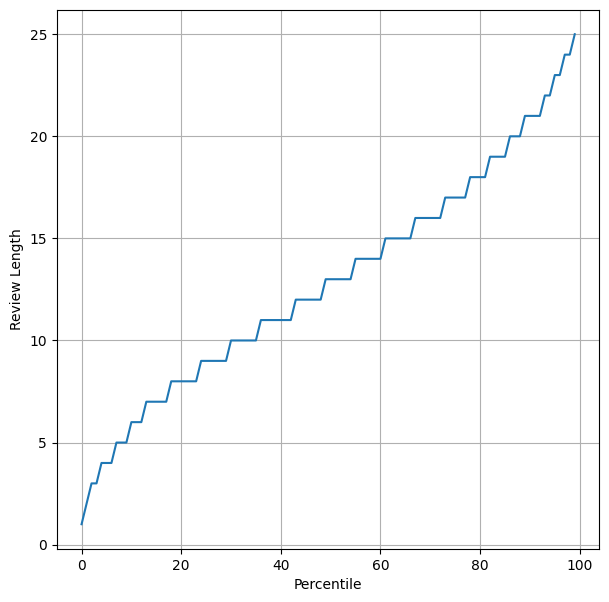

In [11]:
review_len = np.array([len(x.split()) for x in df_dedup['text'].values])
review_len = np.sort(review_len)
review_len_percnt = np.percentile(review_len,range(100))
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.plot(range(100),review_len_percnt)
ax.set_xlabel("Percentile")
ax.set_ylabel("Review Length")
plt.grid()
plt.show()

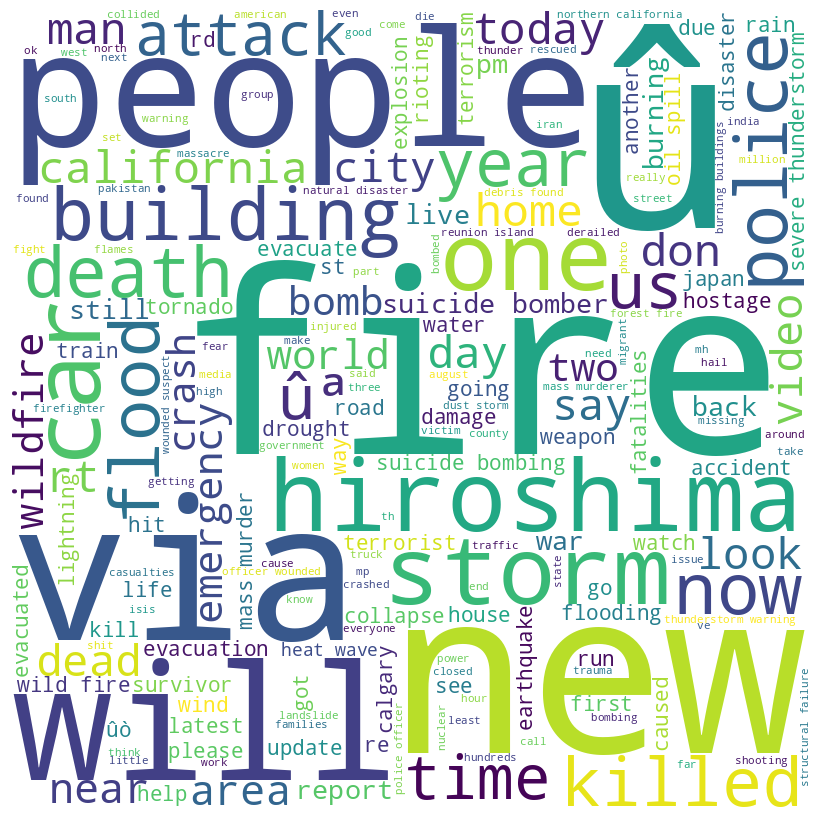

In [12]:
positive_sentences = ""
for sentence in df_dedup[df_dedup['target'] == 1]['text'].tolist():
    positive_sentences = positive_sentences + " "+sentence
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(positive_sentences)
# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

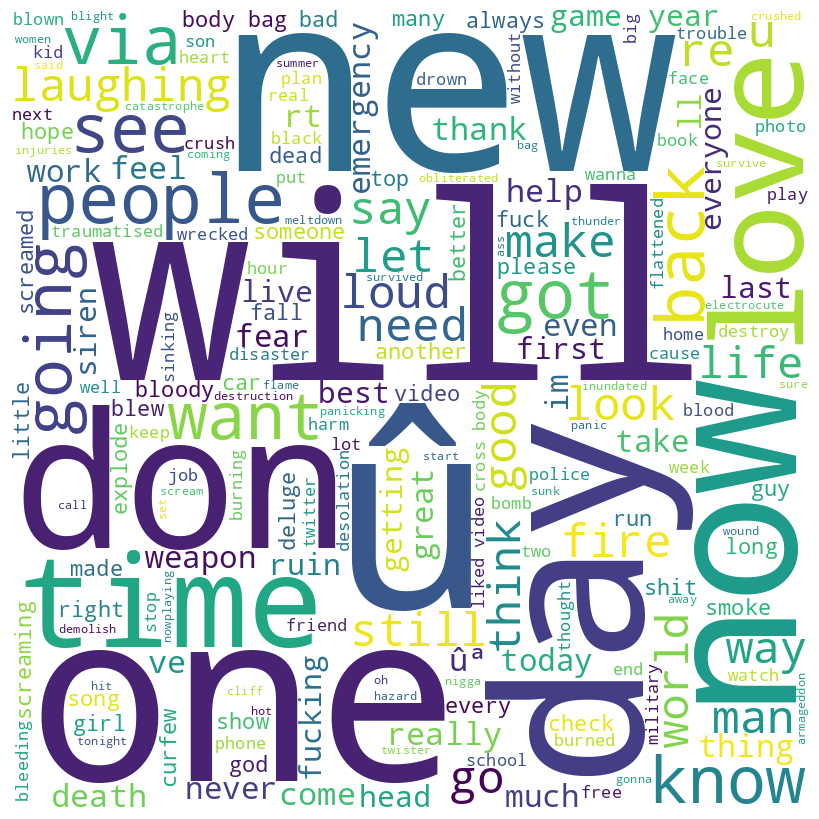

In [13]:
negative_sentences = ""
for sentence in df_dedup[df_dedup['target'] == 0]['text'].tolist():
    negative_sentences = negative_sentences + " "+sentence
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(negative_sentences)
# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [14]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(df_dedup['text'],df_dedup['target'], stratify=df_dedup['target'],random_state=35,test_size=0.1)

In [15]:
tokenizer = AutoTokenizer.from_pretrained("roberta-base") #Tokenizer
train_inputs = tokenizer(X_train.tolist(), padding=True, truncation=True, return_tensors='tf') #Tokenized text
train_labels = y_train
test_inputs = tokenizer(X_test.tolist(), padding=True, truncation=True, return_tensors='tf') #Tokenized text
test_labels = y_test

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [16]:
class LossOnHistoryRobert(tf.keras.callbacks.Callback):

    def __init__(self,x_val,y_val):

        self.x_val = x_val

        self.y_val = y_val

    def on_train_begin(self, logs={}):

        self.history={'loss': [],'accuracy': [],'val_loss': [],'val_accuracy': [],'val_f1': []}

    def on_epoch_end(self, epoch, logs={}):

        true_positives=0

        self.history['loss'].append(logs.get('loss'))

        self.history['accuracy'].append(logs.get('accuracy'))

        if logs.get('val_loss', -1) != -1:

            self.history['val_loss'].append(logs.get('val_loss'))

        if logs.get('val_accuracy', -1) != -1:

            self.history['val_accuracy'].append(logs.get('val_accuracy'))

        #y_pred gives us the probability value

        y_pred= self.model.predict(self.x_val)

        y_pred = np.argmax(np.array(y_pred.logits),axis=1)

        #The micro_f1 score

        f1 = f1_score(self.y_val.values, y_pred)

	#confusion_matrix

        print(confusion_matrix(self.y_val.values, y_pred))

        self.history['val_f1'].append(f1)

        print('F1_Score: ',f1)

model = TFAutoModelForSequenceClassification.from_pretrained("roberta-base", num_labels=2)

model.compile(

        optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001, clipnorm=1.),

        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),

        metrics=[tf.metrics.SparseCategoricalAccuracy()],

        )

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predicti

In [17]:
history_own=LossOnHistoryRobert(dict(test_inputs),test_labels)
history=model.fit(dict(train_inputs),train_labels, validation_data=[dict(test_inputs),test_labels], batch_size=32,epochs=3, verbose=1, callbacks=history_own)

Epoch 1/3


I0000 00:00:1706670170.213389     106 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


22/22 [==============================] - 5s 64ms/steploss: 0.
[[365  35]
 [ 79 198]]
F1_Score:  0.7764705882352941
191/191 [==============================] - 110s 298ms/step - loss: 0.4752 - sparse_categorical_accuracy: 0.7775 - val_loss: 0.3863 - val_sparse_categorical_accuracy: 0.8316
Epoch 2/3
22/22 [==============================] - 1s 64ms/steploss: 0.
[[349  51]
 [ 58 219]]
F1_Score:  0.8007312614259597
191/191 [==============================] - 46s 240ms/step - loss: 0.3630 - sparse_categorical_accuracy: 0.8503 - val_loss: 0.3845 - val_sparse_categorical_accuracy: 0.8390
Epoch 3/3
22/22 [==============================] - 1s 64ms/steploss: 0.
[[368  32]
 [ 73 204]]
F1_Score:  0.7953216374269005
191/191 [==============================] - 45s 238ms/step - loss: 0.3117 - sparse_categorical_accuracy: 0.8759 - val_loss: 0.4003 - val_sparse_categorical_accuracy: 0.8449


In [18]:
def final(args):

    output_lst = []

    for x in args:

        x = preprocess(x)

        x = tokenizer(x,return_tensors='tf')

        x = model(x).logits

        if x.numpy()[0][0] > x.numpy()[0][1]:

            output_lst.append(0)

        else:
            output_lst.append(1)

    return output_lst

In [22]:
# Get embeddings for test dataframe
df_test = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")
df_test['text'] = df_test['text'].apply(preprocess)
test_inputs = tokenizer(df_test['text'].tolist(), padding=True, truncation=True, return_tensors='tf') #Tokenized text
predictions = model(test_inputs).logits
predictions_binary = [0 if x[0] > x[1] else 1 for x in predictions]
predictions_binary

[1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,


In [23]:
submission_df = pd.read_csv("/kaggle/input/nlp-getting-started/sample_submission.csv")
submission = pd.DataFrame({"id": submission_df['id'],
            "target":predictions_binary})
submission.to_csv('/kaggle/working/submission.csv', index=False)